In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("final_project.csv")

# Remove rows with missing values
df = df.dropna()

# Remove '%' from column 32 and convert to float
df['column 32'] = df['x32'].str.rstrip('%').astype('float') / 100

# Remove '$' from column 37 and convert to float
df['column 37'] = df['x37'].str.replace('$', '').astype('float')

# Normalize the month names in the dataframe
month_mapping = {
    "January": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", 
    "May": "May", "Jun": "Jun", "July": "July", "Aug": "Aug", 
    "sept.": "Sept", "Oct": "Oct", "Nov": "Nov", "Dev": "Dec"
}

df['x29'] = df['x29'].map(month_mapping)

# Correct spelling
df['x30'] = df['x30'].replace({'thurday': 'thursday'})

c:\ProgramData\Anaconda3\envs\tf2_gpu\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [23]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x49,y,column 32,column 37
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0.0000,1313.96
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,-0.0002,1962.78
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,-0.0001,430.47
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,0.0001,-2366.29
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,0.0001,-620.66


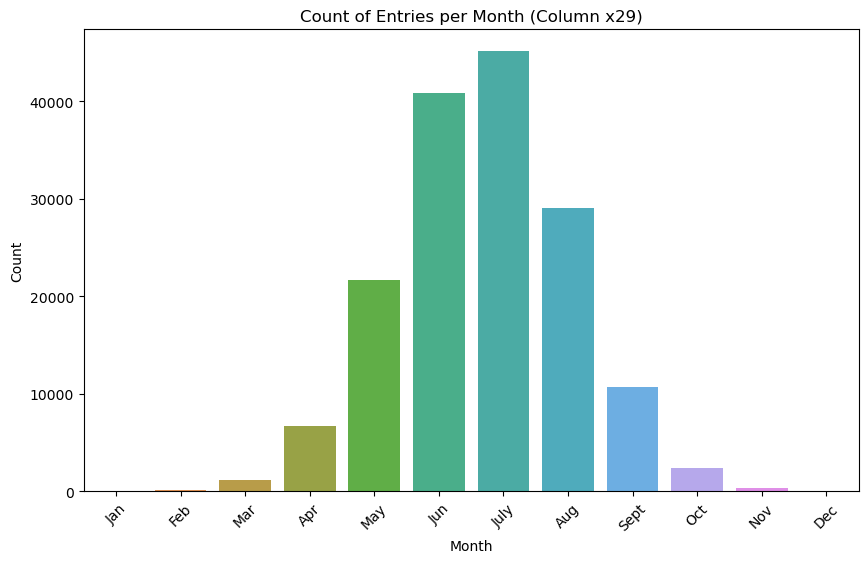

In [24]:
# Order for the months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='x29', data=df, order=month_order)
plt.title('Count of Entries per Month (Column x29)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

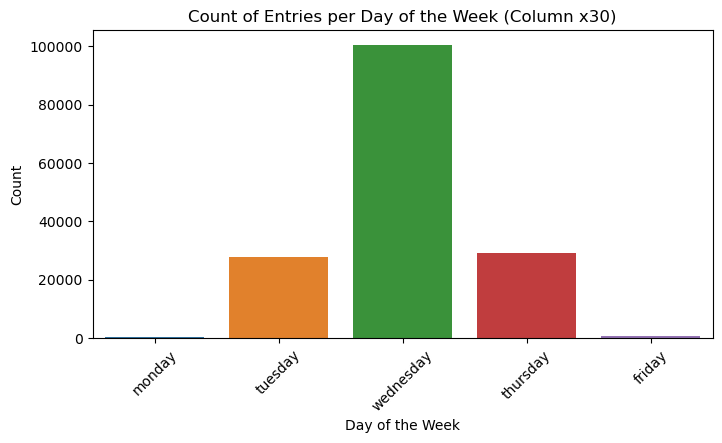

In [25]:
day_order = ["monday", "tuesday", "wednesday", "thursday", "friday"]

plt.figure(figsize=(8, 4))
sns.countplot(x='x30', data=df, order=day_order)
plt.title('Count of Entries per Day of the Week (Column x30)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Mapping from month names to numeric values for modeling
month_to_num = {
    "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, "May": 4, "Jun": 5, 
    "July": 6, "Aug": 7, "Sept": 8, "Oct": 9, "Nov": 10, "Dec": 11
}

# Convert the month names to numeric values
df['x29'] = df['x29'].map(month_to_num)


# Same process for days of the week
day_to_num = {
    "monday": 0, "tuesday": 1, "wednesday": 2, "thursday": 3, "friday": 4
}

df['x30'] = df['x30'].map(day_to_num)

# Transform 'x24' column
df['x24'] = df['x24'].replace({'asia': 'eastern countries', 'euorpe': 'western countries', 'america': 'western countries'})

# One-hot encode the 'x24' column
x24_encoded = pd.get_dummies(df['x24'], prefix='x24')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, x24_encoded], axis=1)

In [27]:
# Separate features and target
X = df.drop('y', axis=1)
X = X.select_dtypes(include=[np.number])
y = df['y']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# # Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}

# # Define the parameter grid
# param_grid = {
#     'max_depth': [25, 30, 35],     # Maximum depth of the tree
#     'min_samples_split': [3, 4, 5],     # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 3]        # Minimum number of samples required to be at a leaf node
# }

# # Create the grid search model
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, 
#                            cv=4, n_jobs=1, scoring='f1', verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

In [29]:
# # Train the Random Forest model with best parameters

# best_params = {
#     'max_depth': 30,
#     'min_samples_leaf': 1,
#     'min_samples_split': 5
# }

# rf_best = RandomForestClassifier(random_state=42, n_estimators=400, **best_params)
# rf_best.fit(X_train, y_train)

# def calculate_loss(y_true, y_pred, cost_1=100, cost_0=40):
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     return fp * cost_0 + fn * cost_1

# # Find the best threshold to minimize financial loss
# probabilities = rf_best.predict_proba(X_test)[:, 1]
# thresholds = np.linspace(0, 1, 101)
# best_loss = float('inf')
# best_threshold = 0.5

# for threshold in thresholds:
#     predictions = (probabilities >= threshold).astype(int)
#     loss = calculate_loss(y_test, predictions)
#     if loss < best_loss:
#         best_loss = loss
#         best_threshold = threshold

# # Evaluate the model using the best threshold
# final_predictions = (probabilities >= best_threshold).astype(int)
# final_loss = calculate_loss(y_test, final_predictions)

# # Calculate summary statistics
# accuracy = accuracy_score(y_test, final_predictions)
# precision = precision_score(y_test, final_predictions)
# recall = recall_score(y_test, final_predictions)
# f1 = f1_score(y_test, final_predictions)

# print("Best Threshold:", best_threshold)
# print("Financial Loss with Best Threshold:", final_loss)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [30]:
# Define the Random Forest model with best parameters
best_params = {
    'max_depth': 30,
    'min_samples_leaf': 1,
    'min_samples_split': 5
}

def calculate_loss(y_true, y_pred, cost_1=100, cost_0=40):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp * cost_0 + fn * cost_1

rf_best = RandomForestClassifier(random_state=42, n_estimators=400, **best_params)

# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to calculate the total loss and other metrics
total_loss = 0
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate through each fold using KFold
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    rf_best.fit(X_train, y_train)

    # Predict probabilities on the test set
    probabilities = rf_best.predict_proba(X_test)[:, 1]

    # Find the best threshold to minimize financial loss
    thresholds = np.linspace(0, 1, 101)
    best_loss = float('inf')
    best_threshold = 0.5

    for threshold in thresholds:
        predictions = (probabilities >= threshold).astype(int)
        loss = calculate_loss(y_test, predictions)
        if loss < best_loss:
            best_loss = loss
            best_threshold = threshold

    # Evaluate the model using the best threshold
    final_predictions = (probabilities >= best_threshold).astype(int)
    total_loss += calculate_loss(y_test, final_predictions)

    # Calculate summary statistics
    accuracies.append(accuracy_score(y_test, final_predictions))
    precisions.append(precision_score(y_test, final_predictions))
    recalls.append(recall_score(y_test, final_predictions))
    f1_scores.append(f1_score(y_test, final_predictions))

# Calculate average of the metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print the results
print("Total Financial Loss:", total_loss)
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

Total Financial Loss: 718720
Average Accuracy: 0.9183418044160913
Average Precision: 0.862757262342164
Average Recall: 0.9472052033270352
Average F1 Score: 0.9029930759403509


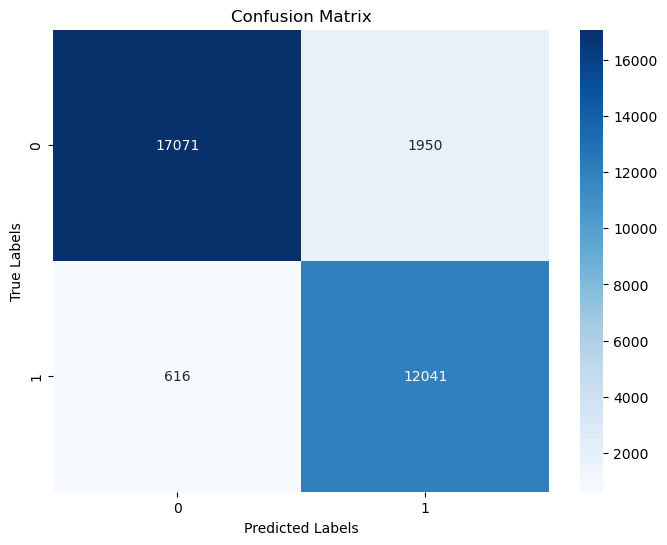

In [31]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()